In [1]:
import numpy as np
import pandas as pd

In [2]:
# Creacion del DataFrame

# Creacion de una lista de 100 elementos con valores aleatorios entre 50 y 120
velocidad = [np.round(np.random.uniform(50, 120), 3) for _ in range(100)]
# Creacion de una lista de 100 elementos con valores aleatorios entre 0.5 y 4
Tiempo = [np.round(np.random.uniform(0.5, 4), 3) for _ in range(100)]
# Creacion de una lista vacia para almacenar la distancia
distancia = []
# Calculo de la distancia recorrida (multiplicando la velocidad por el tiempo)
for v, t in zip(velocidad, Tiempo):
  d = v * t # Distancia = Velocidad * Tiempo
  distancia.append(np.round(d, 3)) # Agregar la distancia a la lista

# Creacion del DataFrame con las listas creadas
datos = pd.DataFrame({'Velocidad': velocidad, 'Tiempo': Tiempo, 'Distancia': distancia})
datos

,Velocidad,Tiempo,Distancia
0,66.912,0.717,47.976
1,108.613,3.947,428.696
2,115.425,1.428,164.827
3,80.128,3.131,250.881
4,79.184,2.706,214.272
...,...,...,...
95,58.246,1.270,73.972
96,102.515,1.547,158.591
97,116.980,3.609,422.181
98,87.178,0.843,73.491


In [3]:
# Separacion en caracteristicas y salidas
x = datos[['Velocidad', 'Tiempo']]
y = datos['Distancia']

In [4]:
# Separar los datos en conjuntos de entrenamiento y prueba
import sklearn.model_selection as model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=50)

In [5]:
# Importar las bibliotecas necesarias
import tensorflow as tf
from tensorflow import keras

# Crear el modelo
modelo = keras.Sequential([
    keras.layers.Dense(units=64, activation='relu', input_shape=[2]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=1)
])

# Compilar el modelo
modelo.compile(optimizer="adam", loss='mean_squared_error')

In [6]:
# Normalizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Entrenar el modelo
historial = modelo.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, batch_size=50, validation_split=0.2)

# Evaluar el modelo
perdida = modelo.evaluate(x_test, y_test)
print("Perdida:", perdida)

Epoch 1/1000
2/2 [==============================] - 4s 1s/step - loss: 43270.8789 - val_loss: 40324.3906
Epoch 2/1000
2/2 [==============================] - 0s 110ms/step - loss: 43256.2109 - val_loss: 40303.6484
Epoch 3/1000
2/2 [==============================] - 0s 208ms/step - loss: 43227.7305 - val_loss: 40282.8906
Epoch 4/1000
2/2 [==============================] - 0s 143ms/step - loss: 43204.4922 - val_loss: 40261.7539
Epoch 5/1000
2/2 [==============================] - 0s 177ms/step - loss: 43184.0859 - val_loss: 40239.6953
Epoch 6/1000
2/2 [==============================] - 0s 165ms/step - loss: 43153.2656 - val_loss: 40216.0898
Epoch 7/1000
2/2 [==============================] - 0s 160ms/step - loss: 43129.1562 - val_loss: 40191.0625
Epoch 8/1000
2/2 [==============================] - 0s 158ms/step - loss: 43119.8164 - val_loss: 40164.5508
Epoch 9/1000
2/2 [==============================] - 0s 217ms/step - loss: 43073.6719 - val_loss: 40136.0664
Epoch 10/1000
2/2 [============

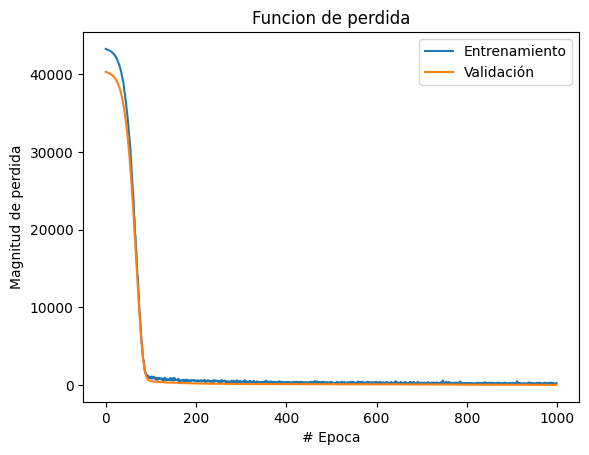

In [7]:
# Evaluar el modelo
import matplotlib.pyplot as plt
plt.title("Funcion de perdida")
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.legend()
plt.show()

In [8]:
# Predecir la distancia recorrida para los siguientes datos:
#1) Velocidad = 55Km/h, Tiempo = 1.2h
#2) Velocidad = 75Km/h, Tiempo = 3h
#3) Velocidad = 60Km/h, Tiempo = 2h
datos_prueba = pd.DataFrame(
  {'Velocidad': [55, 75, 60],
    'Tiempo': [1.2, 3, 2]}
)

# Normalizar los datos de prueba
datos_prueba_n = scaler.transform(datos_prueba)

# Predecir las distancias recorridas en base a los datos normalizados
predicciones = modelo.predict(datos_prueba_n)

# Mostrar las predicciones
print("Predicciones de distancias para:")
for i, (velocidad, tiempo, prediccion) in enumerate(zip(datos_prueba['Velocidad'], datos_prueba['Tiempo'], predicciones), 1):
    print(f"{i}) Velocidad: {velocidad} * Tiempo: {tiempo} = {prediccion[0]}")

print("Distancias reales para:")
for i, (velocidad, tiempo) in enumerate(zip(datos_prueba['Velocidad'], datos_prueba['Tiempo']), 1):
    print(f"{i}) Velocidad: {velocidad} * Tiempo: {tiempo} = {velocidad*tiempo}")

1/1 [==============================] - 0s 114ms/step
Predicciones de distancias para:
1) Velocidad: 55 * Tiempo: 1.2 = 65.80057525634766
2) Velocidad: 75 * Tiempo: 3.0 = 219.73826599121094
3) Velocidad: 60 * Tiempo: 2.0 = 120.97848510742188
Distancias reales para:
1) Velocidad: 55 * Tiempo: 1.2 = 66.0
2) Velocidad: 75 * Tiempo: 3.0 = 225.0
3) Velocidad: 60 * Tiempo: 2.0 = 120.0
